In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv(r'D:\workspace\MachineLearning\Datasets\Datasets\monthly-milk-production-pounds-p.csv', index_col=0)

In [26]:
df.shape

(168, 1)

In [27]:
y = df['Milk']
y_train = y.iloc[:-12]
y_test = y.iloc[-12:]
y_train.shape, y_test.shape

((156,), (12,))

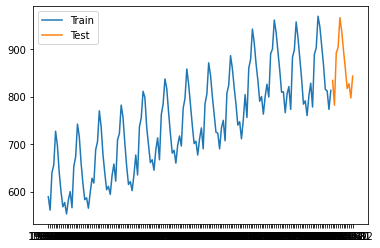

In [28]:
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.legend()
plt.show()

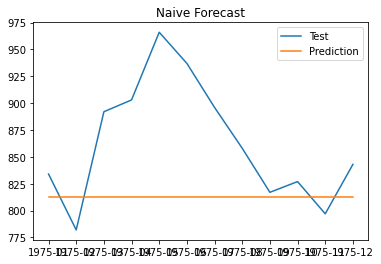

In [29]:
last_obs = y_train.iloc[-1]
y_pred = pd.Series(last_obs.repeat(len(y_test)), index=y_test.index)
plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Prediction')
plt.title('Naive Forecast')
plt.legend()
plt.show()

In [30]:
mse = mean_squared_error(y_test, y_pred)
mse ** 0.5

73.4903621799031

SEASONAL NAIVE FORECAST

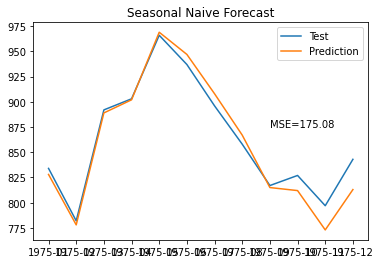

In [31]:
y_pred = y_train.iloc[-12:]
y_pred.index = y_test.index
plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Prediction')
error = np.round(mean_squared_error(y_test,y_pred),2)
plt.text(8,875, "MSE="+str(error))
plt.title('Seasonal Naive Forecast')
plt.legend()
plt.show()

In [32]:
mse = mean_squared_error(y_test, y_pred)
mse ** 0.5

13.231905884389192

### Window Average Forecast

In [ ]:
# errors = []

# for span in np.arange(2,20):
#     rolling_mean = y_train.iloc[-span]
#     y_pred = pd.Series(rolling_mean.repeat(len(y_test)), index=y_test.index)
#     errors.append([span,np.round(mean_squared_error(y_test,y_pred),2)])

# errors_df = pd.DataFrame(errors, columns=['Span','MSE'])
# errors_df.sort_values('MSE')
# # plt.plot(y_test, label='Test')
# # plt.plot(y_pred, label='Prediction')
# # plt.title('Naive Forecast')
# # plt.legend()
# # plt.show()

,Span,MSE
3,5,2952.83
16,18,3270.17
15,17,3592.83
8,10,3627.50
10,12,4135.83
7,9,4481.17
4,6,4989.17
2,4,5206.17
1,3,5501.17
11,13,6614.50


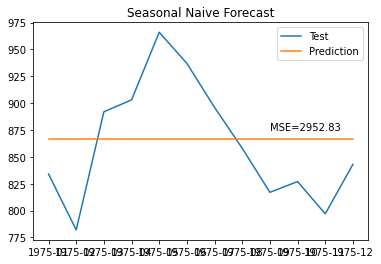

In [46]:
span = 5

rolling_mean = y_train.iloc[-span].mean()
y_pred = pd.Series(rolling_mean.repeat(len(y_test)), index=y_test.index)
plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Prediction')
error = np.round(mean_squared_error(y_test,y_pred),2)
plt.text(8,875, "MSE="+str(error))
plt.title('Seasonal Naive Forecast')
plt.legend()
plt.show()

### Centered Rolling Mean

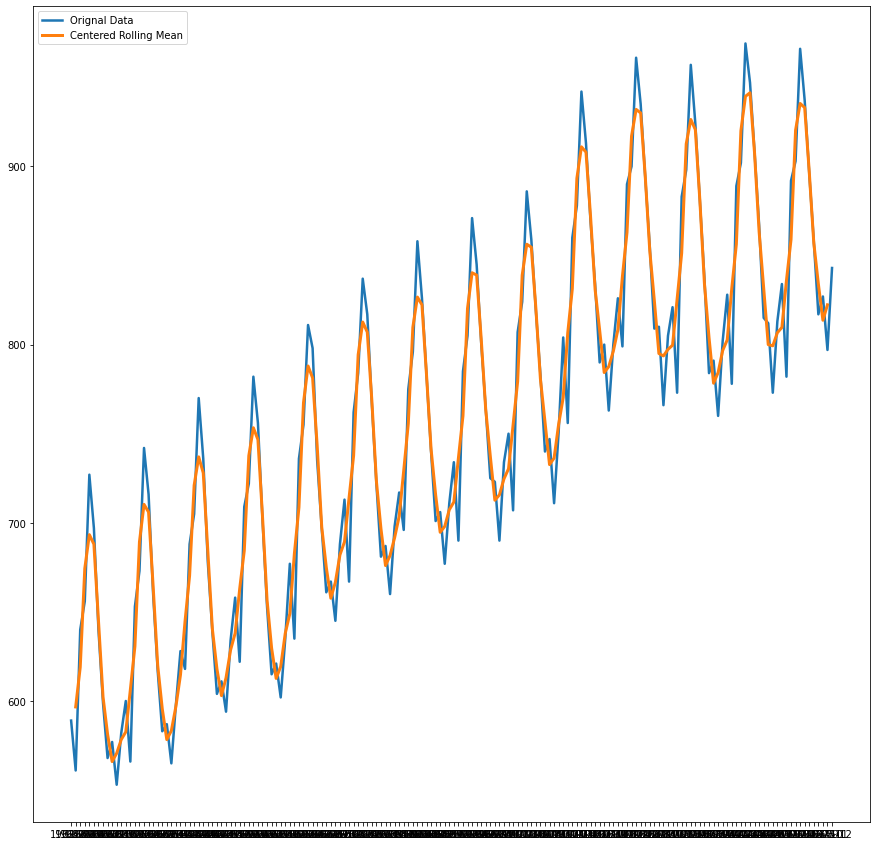

In [55]:
span = 3
plt.figure(figsize=(15,15))
plt.plot(y, label='Orignal Data', linewidth = 2.5)
plt.plot(y.rolling(span,center=True).mean(), label='Centered Rolling Mean', linewidth=3)
plt.legend()
plt.show()
